In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn import metrics
from sklearn import svm

In [4]:
raw_data=pd.read_csv("train.csv")
raw2_data=pd.read_csv("test.csv")

In [5]:
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
raw2_data
# Survived column is missing in "test.csv" file. In the next step, the survivor column and its corresponding values will be added from
# "gender_submission.csv" file

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
gender_data=pd.read_csv("gender_submission.csv")
gender_data['Survived'] = gender_data['Survived'].astype(int)
gender_data.dtypes
gender_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
#Insert "Survived " from gender data set to raw2_data set
raw2_data.insert(loc=1, column='Survived', value=gender_data['Survived'].values)
raw2_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
raw_data.shape

(891, 12)

In [10]:
raw2_data.shape

(418, 12)

In [11]:
#Both dataframes "raw_data" & "raw2_data" have the same number of columns and in the same order
# It can be combined into a single dataframe
frames=[raw_data,raw2_data]
titanic_df0 = pd.concat(frames)
titanic_df0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
# Drop data that cannot be categorised. Name & Ticket will be dropped
titanic_df0 = titanic_df0.drop(['Name','Ticket'], axis=1)
titanic_df0

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,NaN,S
414,1306,1,1,female,39.0,0,0,108.9000,C105,C
415,1307,0,3,male,38.5,0,0,7.2500,NaN,S
416,1308,0,3,male,NaN,0,0,8.0500,NaN,S


In [13]:
# Create new column "Cabin section" where we replace NaN by N (non cabin)  and  the first letter for cabin
# Cabin column will be dropped

titanic_df0["Cabin_section"] = titanic_df0["Cabin"].apply(lambda x: str(x)[0])
titanic_df0 = titanic_df0.drop(['Cabin'], axis=1)
titanic_df0

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_section
0,1,0,3,male,22.0,1,0,7.2500,S,n
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,n
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,n
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,S,n
414,1306,1,1,female,39.0,0,0,108.9000,C,C
415,1307,0,3,male,38.5,0,0,7.2500,S,n
416,1308,0,3,male,NaN,0,0,8.0500,S,n


In [14]:
# there are some missing data in the column "Age", it will be replace " NAs" by "Mean" value
titanic_df0["Age"] = titanic_df0["Age"].fillna(titanic_df0["Age"].mean())
titanic_df0

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_section
0,1,0,3,male,22.000000,1,0,7.2500,S,n
1,2,1,1,female,38.000000,1,0,71.2833,C,C
2,3,1,3,female,26.000000,0,0,7.9250,S,n
3,4,1,1,female,35.000000,1,0,53.1000,S,C
4,5,0,3,male,35.000000,0,0,8.0500,S,n
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,29.881138,0,0,8.0500,S,n
414,1306,1,1,female,39.000000,0,0,108.9000,C,C
415,1307,0,3,male,38.500000,0,0,7.2500,S,n
416,1308,0,3,male,29.881138,0,0,8.0500,S,n


In [15]:
#create dummy, encode "Sex" values using One-Hot-Encoding method, transforming 1 categorical column with n unique values into n-1 dummies.
dummy = pd.get_dummies(titanic_df0["Sex"], 
                       prefix="Sex",drop_first=True)
titanic_df0= pd.concat([titanic_df0, dummy], axis=1)
titanic_df0 = titanic_df0.drop(['Sex'], axis=1)
titanic_df0

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Cabin_section,Sex_male
0,1,0,3,22.000000,1,0,7.2500,S,n,1
1,2,1,1,38.000000,1,0,71.2833,C,C,0
2,3,1,3,26.000000,0,0,7.9250,S,n,0
3,4,1,1,35.000000,1,0,53.1000,S,C,0
4,5,0,3,35.000000,0,0,8.0500,S,n,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,29.881138,0,0,8.0500,S,n,1
414,1306,1,1,39.000000,0,0,108.9000,C,C,0
415,1307,0,3,38.500000,0,0,7.2500,S,n,1
416,1308,0,3,29.881138,0,0,8.0500,S,n,1


In [16]:
# Category conversion, Embarked & Cabin_section were converted into binary
binary_Emb=pd.get_dummies(titanic_df0["Embarked"])
binary_Emb
titanic_df1 = pd.concat((titanic_df0, binary_Emb), axis=1)
titanic_df1.rename(columns={'C': 'Embarked_C', 'Q': 'Embarked_Q', 'S': 'Embarked_S'}, inplace=True)
titanic_df1
binary_Cabin=pd.get_dummies(titanic_df0["Cabin_section"])
binary_Cabin
titanic_df2 = pd.concat((titanic_df1, binary_Cabin), axis=1)
titanic_df2.rename(columns={'A': 'Cabin_A', 'B': 'Cabin_B', 'C': 'Cabin_C', 'D': 'Cabin_D', 'E': 'Cabin_E', 'F': 'Cabin_F', 'G': 'Cabin_G', 'T': 'Cabin_T', 'n': 'NoCabin'}, inplace=True)
#titanic_df = titanic_df2.drop(['Embarked', 'Cabin_section'], axis=1)
titanic_df = titanic_df2.drop(['Embarked'], axis=1)
titanic_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_section,Sex_male,Embarked_C,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,NoCabin
0,1,0,3,22.000000,1,0,7.2500,n,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1,1,38.000000,1,0,71.2833,C,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,26.000000,0,0,7.9250,n,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,C,0,0,...,1,0,0,1,0,0,0,0,0,0
4,5,0,3,35.000000,0,0,8.0500,n,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,29.881138,0,0,8.0500,n,1,0,...,1,0,0,0,0,0,0,0,0,1
414,1306,1,1,39.000000,0,0,108.9000,C,0,1,...,0,0,0,1,0,0,0,0,0,0
415,1307,0,3,38.500000,0,0,7.2500,n,1,0,...,1,0,0,0,0,0,0,0,0,1
416,1308,0,3,29.881138,0,0,8.0500,n,1,0,...,1,0,0,0,0,0,0,0,0,1


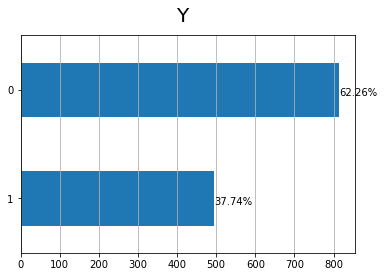

In [17]:
# Train nb 1, rename the column "Survived" as “Y”. It contains two classes: 1 if the passenger survived and 0 if not (it is a binary classification problem)
titanic_df = titanic_df.set_index("PassengerId")
titanic_df = titanic_df.rename(columns={"Survived":"Y"})

y = "Y"
ax = titanic_df[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()
# According to the plot below: 62.26% of passengers have not survived, 37.74% have survived

Text(0.5, 1.0, 'Cabin_section vs Pclass (filter: Y)')

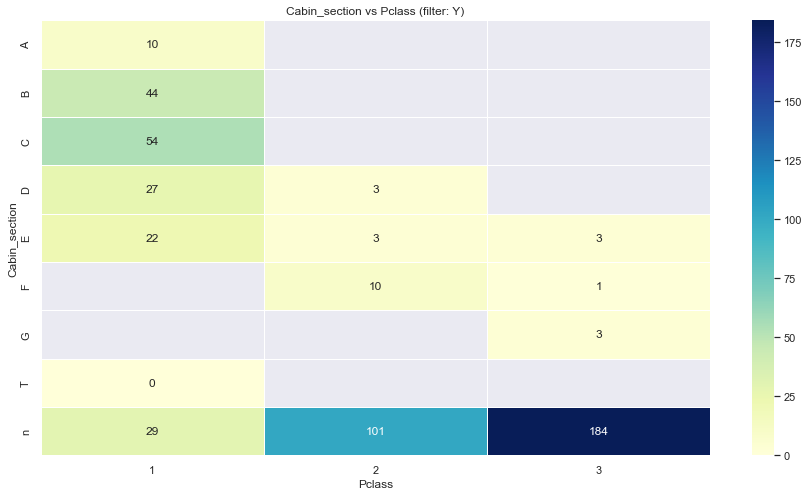

In [18]:
## Plot contingency table
cont_table = pd.crosstab(index=titanic_df["Cabin_section"], 
             columns=titanic_df["Pclass"], values=titanic_df["Y"], aggfunc="sum")
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cont_table, annot=True, cmap="YlGnBu", fmt='.0f',
            linewidths=.5).set_title( 
            'Cabin_section vs Pclass (filter: Y)' )


In [19]:
# Most of the survivors are from first and third class
# In the first class, most of the survivors were in cabin. Especially cabin B & C.
# In third class, most of the survivors were not in cabin

Text(0.5, 1.0, 'pearson correlation')

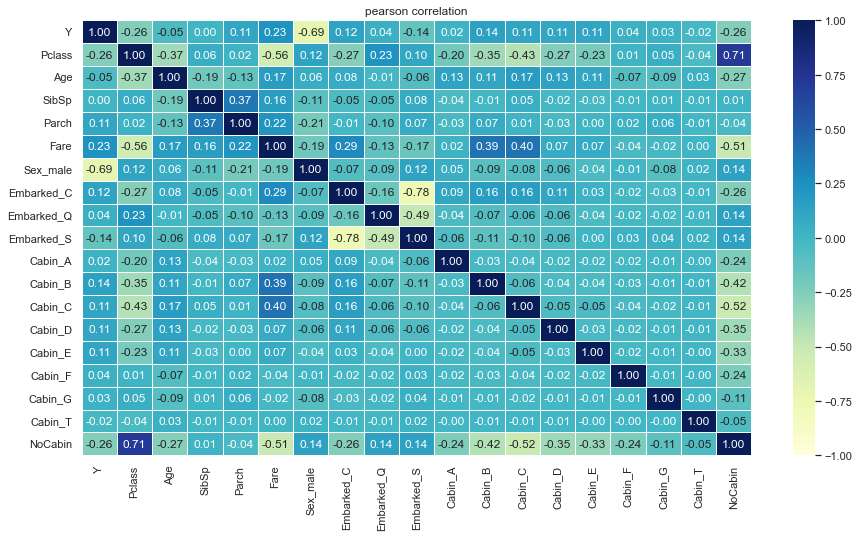

In [20]:
# Build a correlation matrix to see the correlation between different parameters
titanic_df = titanic_df.drop(['Cabin_section'], axis=1)
corr_matrix = titanic_df.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")


In [21]:
# as per cross relation matrix there is a strong correlation between Pclass and NoCabin

In [22]:
#Random forest
#decision tree
#linear regression
titanic_df # Display pre-processed dataframe

,Y,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,NoCabin
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,1,38.000000,1,0,71.2833,0,1,0,0,0,0,1,0,0,0,0,0,0
3,1,3,26.000000,0,0,7.9250,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,1,35.000000,1,0,53.1000,0,0,0,1,0,0,1,0,0,0,0,0,0
5,0,3,35.000000,0,0,8.0500,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,29.881138,0,0,8.0500,1,0,0,1,0,0,0,0,0,0,0,0,1
1306,1,1,39.000000,0,0,108.9000,0,1,0,0,0,0,1,0,0,0,0,0,0
1307,0,3,38.500000,0,0,7.2500,1,0,0,1,0,0,0,0,0,0,0,0,1


In [23]:
titanic_df.isnull().values.any()

True

In [24]:
titanic_df.dropna()

,Y,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,NoCabin
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,1,38.000000,1,0,71.2833,0,1,0,0,0,0,1,0,0,0,0,0,0
3,1,3,26.000000,0,0,7.9250,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,1,35.000000,1,0,53.1000,0,0,0,1,0,0,1,0,0,0,0,0,0
5,0,3,35.000000,0,0,8.0500,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,29.881138,0,0,8.0500,1,0,0,1,0,0,0,0,0,0,0,0,1
1306,1,1,39.000000,0,0,108.9000,0,1,0,0,0,0,1,0,0,0,0,0,0
1307,0,3,38.500000,0,0,7.2500,1,0,0,1,0,0,0,0,0,0,0,0,1


In [25]:
titanic_df['Fare'].isnull().values.any() # Some values in "Fare" column are Nan

True

In [26]:
# There are some missing data in the column "Fare", it will be replaced by the mean value
titanic_df["Fare"] = titanic_df["Fare"].fillna(titanic_df["Fare"].mean())
titanic_df.isnull().values.any()

False

In [27]:
#Random forest 

X0 = titanic_df[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_T','NoCabin']] #Features
y0 = titanic_df['Y'] # Target
X0_train, X0_test, y0_train, y0_test = train_test_split(X0,y0,test_size=0.2,random_state=150) # 80% training & 20% test

In [28]:
clf_RF=RandomForestClassifier(n_estimators=150) # use Random forest classifier
# Train the model using the training sets y0_pred=clf_RF.predict(X0_test)
clf_RF.fit(X0_train,y0_train)
y0_pred=clf_RF.predict(X0_test)

In [29]:
#Model accuracy, how often is the Random forest classifier correct?
print("Random forest Accuracy:", metrics.accuracy_score(y0_test,y0_pred))

Random forest Accuracy: 0.8435114503816794


In [30]:
# Random forest has an accuracy of 84%

In [31]:
# Create decision tree classifier
X1 = titanic_df[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_T','NoCabin']] #Features
y1 = titanic_df['Y'] # Target
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2, random_state=100) # 80% training & 20% test

In [32]:
clf_DT=DecisionTreeClassifier() # use decision Tree classifier
# Train the model using the training sets y1_pred=clf_RF.predict(X1_test)
clf_DT.fit(X1_train,y1_train)
y1_pred=clf_DT.predict(X1_test)

In [33]:
#Model accuracy, how often is the decision tree classifier correct?
print("DecisionTree Accuracy:", metrics.accuracy_score(y1_test,y1_pred))

DecisionTree Accuracy: 0.851145038167939


In [34]:
# Decision tree classifier has an accuracy of 85%

In [38]:
#SVM classifier
X2 =titanic_df[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Cabin_A','Cabin_B','Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Cabin_T','NoCabin']] #Features
y2 = titanic_df['Y'] # Target
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=100) # 80% training & 20% test

In [39]:
clf_SVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_SVM.fit(X2_train, y2_train)

#Predict the response for test dataset
y2_pred = clf_SVM.predict(X2_test)

In [40]:
#Model accuracy, how often is SVM classifier correct?
print("SVM Accuracy:", metrics.accuracy_score(y2_test,y2_pred))

SVM Accuracy: 0.8740458015267175


In [54]:
# SVM classifier has an accuracy of 87%

In [75]:
A0=metrics.accuracy_score(y0_test,y0_pred)*100 # Accuracy of Random forests classifier
A1=metrics.accuracy_score(y1_test,y1_pred)*100 # Accuracy of Decision treee classifier
A2=metrics.accuracy_score(y2_test,y2_pred)*100 # Accuracy of SVM classifier
A_classifier=[A0,A1,A2]
Model=["RandomForest", "DecisionTree","SVM"]

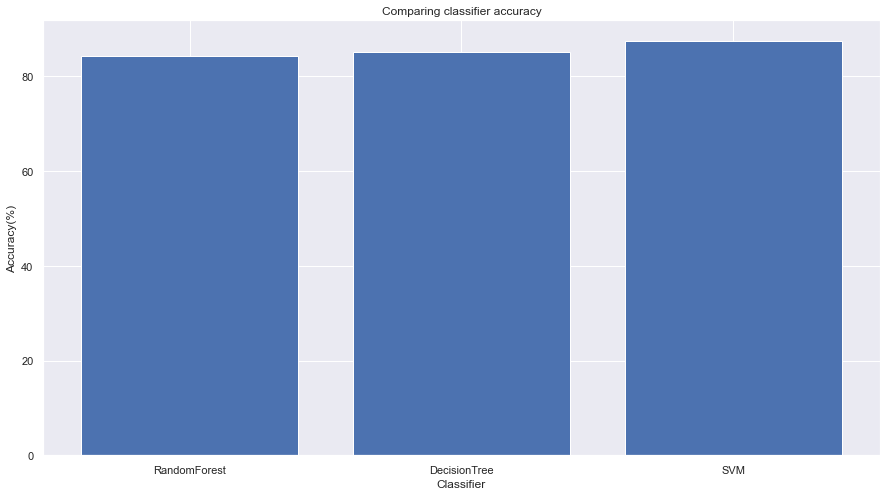

In [77]:

plt.bar(Model,A_classifier)
plt.title('Comparing classifier accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy(%)')

plt.show()

In [ ]:
#I have used in this exercise 3 classifiers for prediction:
#Random forest is the bagging algorithm and uses Ensemble Learning technique. 
#It creates as many trees on the subset of the data and combines the output of all the trees. 
#In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.
#Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.
#A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.
#The low correlation between models is the key of success. the prerequisites for random forest to perform well are:
#there needs to be some actual signal in our features so that models built using those features do better than random guessing.
#the predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.

#Decision Tree classifier- it is a method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
#A tree can be seen as a piecewise constant approximation. The advantage of this classifier is that it does not require data normalisation but it does not support missing data,
#It is able to handle multi-output problems but Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

# SVM-Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. 
#The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.
# The disadvantage is that SVM algorithm is not suitable for large data sets. It does not perform very well when the data set has more noise i.e. target classes are overlapping.

#To conclude SVM classifier has the best accuracy of prediction of 87%, Random forest has the accuracy of 84% and Decision Tree classifier has the accuracy of 85%.

In [ ]:
#Użyłam w tym ćwiczeniu 3 klasyfikatorów do przewidywania:
#Random forest to algorytm typu bagging i wykorzystuje technikę Ensemble Learning.
# Tworzy tyle drzew w podzbiorze danych i łączy dane wyjściowe wszystkich drzew.
# W ten sposób zmniejsza się problem nadmiernego dopasowania w drzewach decyzyjnych, a także zmniejsza wariancję, a tym samym poprawia dokładność.
#Każde pojedyncze drzewo w losowym lesie wypluwa prognozę klasy, a klasa z największą liczbą głosów staje się prognozą naszego modelu.
#Duża liczba stosunkowo nieskorelowanych modeli (drzew) działających jako komisja przewyższy każdy z poszczególnych modeli składowych.
#Niska korelacja między modelami jest kluczem do sukcesu. Warunki wstępne, aby Random Forest działał dobrze, to:
#musi być jakiś rzeczywisty sygnał w naszych funkcjach, aby modele zbudowane przy użyciu tych funkcji działały lepiej niż losowe zgadywanie.
#przewidywania (a tym samym błędy) poszczególnych drzew muszą mieć ze sobą niską korelację.

#Decision Tree classifier – jest to metoda służąca do klasyfikacji i regresji. Celem jest stworzenie modelu, który przewiduje wartość zmiennej docelowej, ucząc się prostych reguł decyzyjnych wywnioskowanych z cech danych.
#Decision Tree classifier może być postrzegane jako odcinkowo stałe przybliżenie. Zaletą tego klasyfikatora jest to, że nie wymaga normalizacji danych, ale nie obsługuje brakujących danych,
#Jest w stanie poradzić sobie z problemami z wieloma wyjściami, ale Decision Tree classifier być niestabilne, ponieważ niewielkie różnice w danych mogą skutkować wygenerowaniem zupełnie innego drzewa. Problem ten jest łagodzony przez użycie drzew decyzyjnych w zespole.

## SVM-Support vector machines (SVM) to zestaw nadzorowanych metod uczenia wykorzystywanych do klasyfikacji, regresji i wykrywania wartości odstających.
#Zaletami maszyn wektorów nośnych są: Efektywne w przestrzeniach wielowymiarowych. Nadal skuteczne w przypadkach, gdy liczba wymiarów jest większa niż liczba próbek.
# Wadą jest to, że algorytm SVM nie nadaje się do dużych zbiorów danych. Nie działa zbyt dobrze, gdy zestaw danych ma więcej szumu, tj. klasy docelowe nakładają się.

# Podsumowując, klasyfikator SVM ma najlepszą dokładność przewidywania 87%, klasyfikator Random Forest - 84% i Decision Tree classifier ma dokladnosc przewidywania 85%